# Practice 8 - Data Clustering 

Data Mining <br>
Name: Miguel Ángel Sánchez Carrillo <br>
Student ID: 1912006 <br>
In the following notebook we use the k means method to cruster the dataset Crimes Mexico.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
route_csv = 'C:/Users/Miguel Sanka/Desktop/crimen_nac_c.csv' 
route_plots = "C:/Users/Miguel Sanka/Desktop/FCFM/Septimo/Data Mining/P8_Data_Clustering/Plots"
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_crime = pd.read_csv(route_csv, encoding='latin')

In [3]:
mexican_states = [
    "Aguascalientes",
    "Baja California",
    "Baja California Sur",
    "Campeche",
    "Chiapas",
    "Chihuahua",
    "Coahuila de Zaragoza",
    "Colima",
    "Durango",
    "Guanajuato",
    "Guerrero",
    "Hidalgo",
    "Jalisco",
    "México",
    "Michoacán de Ocampo",
    "Morelos",
    "Nayarit",
    "Nuevo León",
    "Oaxaca",
    "Puebla",
    "Querétaro",
    "Quintana Roo",
    "San Luis Potosí",
    "Sinaloa",
    "Sonora",
    "Tabasco",
    "Tamaulipas",
    "Tlaxcala",
    "Veracruz de Ignacio de la Llave",
    "Yucatán",
    "Zacatecas"
]

In [4]:
df_crime

,Año,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Sexo/Averiguación previa,Rango de edad
0,2015,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Abuso sexual,Abuso sexual,6,4,0,2,1,1,1,1,0,0,1,1,Averiguación previa,No aplica
1,2015,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Acoso sexual,Acoso sexual,0,0,0,0,0,0,0,0,0,0,0,0,Averiguación previa,No aplica
2,2015,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Hostigamiento sexual,Hostigamiento sexual,1,1,0,1,3,0,1,0,0,1,0,3,Averiguación previa,No aplica
3,2015,Aguascalientes,La libertad y la seguridad sexual,Violación,Violación simple,Violación simple,5,5,3,11,3,15,8,8,6,9,5,6,Averiguación previa,No aplica
4,2015,Aguascalientes,La libertad y la seguridad sexual,Violación,Violación equiparada,Violación equiparada,0,5,3,7,3,4,4,4,3,5,3,0,Averiguación previa,No aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74747,2022,Zacatecas,Libertad personal,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,0,0,0,0,0,0,0,0,0,0,0,0,No identificado,No identificado
74748,2022,Zacatecas,El patrimonio,Extorsión,Extorsión,Extorsión,1,1,1,0,0,1,2,0,0,2,2,2,No identificado,No identificado
74749,2022,Zacatecas,La sociedad,Corrupción de menores,Corrupción de menores,Corrupción de menores,0,0,0,0,0,0,0,0,0,0,0,0,No identificado,No identificado
74750,2022,Zacatecas,La sociedad,Trata de personas,Trata de personas,Trata de personas,0,1,1,0,0,0,0,1,0,0,0,0,No identificado,No identificado


In [5]:
def total_per_syear(entidad: str) -> pd.DataFrame:
    df_p = df_crime[df_crime["Entidad"] == entidad]
    return df_p.groupby('Año')[months].sum()

In [6]:
def total_per_year() -> pd.DataFrame:
    return df_crime.groupby('Año')[months].sum()

In [7]:
df_MX = total_per_year() 
df_NL = total_per_syear("Nuevo León") 

In [8]:
df_MX

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Año,,,,,,,,,,,,
2015,131363,132286,143767,139888,144376,144822,142437,142348,143799,148506,141228,133202
2016,131064,142044,149122,153452,157187,154661,146753,151797,153087,154488,148384,151131
2017,154270,146314,169354,154360,173597,173323,163835,175519,163967,177011,165887,151690
2018,158558,156258,171605,172029,180062,169205,171947,176707,167656,180388,163083,154914
2019,165483,164850,179701,175760,189446,179743,183664,182891,174178,185574,167791,161267
2020,168729,171075,174781,122517,124599,144931,157441,161535,164791,174659,158706,156792
2021,150936,153799,186880,178037,181693,179747,173394,175247,173960,181243,174300,175771
2022,162578,162434,194340,182891,198537,191830,180432,192263,184529,188875,179793,169300


In [9]:
df_NL

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Año,,,,,,,,,,,,
2015,5760,5780,6103,6155,6570,6795,6559,6369,7343,7147,6407,5906
2016,5126,6315,6769,7053,7379,8396,8634,9210,8147,7567,7016,7564
2017,6977,6662,7694,6612,7719,8085,7505,8300,7508,7491,7149,6156
2018,5897,6694,7030,6753,7513,7395,7818,7814,7547,7469,6849,5764
2019,5619,5694,6332,5901,6800,6975,6705,7017,6483,7800,6311,6541
2020,6503,7491,6920,4983,5198,6366,5725,7090,7809,7953,7554,7849
2021,6592,7007,8048,7947,8086,8676,7951,8879,7908,8460,9163,9096
2022,7812,7067,9181,8715,10158,9995,8954,11340,10404,9165,9198,7662


The next lines have the goal of making a list of the dataframe points to create a graph.

In [10]:
points = [] 
x = []
y = [] 
for i in df_MX.index.values:
    for c in df_MX.columns.values:
        x.append(i)
        y.append(df_MX[c][i])
        j = (i, df_MX[c][i])
        points.append(j)

In [11]:
points

[(2015, 131363),
 (2015, 132286),
 (2015, 143767),
 (2015, 139888),
 (2015, 144376),
 (2015, 144822),
 (2015, 142437),
 (2015, 142348),
 (2015, 143799),
 (2015, 148506),
 (2015, 141228),
 (2015, 133202),
 (2016, 131064),
 (2016, 142044),
 (2016, 149122),
 (2016, 153452),
 (2016, 157187),
 (2016, 154661),
 (2016, 146753),
 (2016, 151797),
 (2016, 153087),
 (2016, 154488),
 (2016, 148384),
 (2016, 151131),
 (2017, 154270),
 (2017, 146314),
 (2017, 169354),
 (2017, 154360),
 (2017, 173597),
 (2017, 173323),
 (2017, 163835),
 (2017, 175519),
 (2017, 163967),
 (2017, 177011),
 (2017, 165887),
 (2017, 151690),
 (2018, 158558),
 (2018, 156258),
 (2018, 171605),
 (2018, 172029),
 (2018, 180062),
 (2018, 169205),
 (2018, 171947),
 (2018, 176707),
 (2018, 167656),
 (2018, 180388),
 (2018, 163083),
 (2018, 154914),
 (2019, 165483),
 (2019, 164850),
 (2019, 179701),
 (2019, 175760),
 (2019, 189446),
 (2019, 179743),
 (2019, 183664),
 (2019, 182891),
 (2019, 174178),
 (2019, 185574),
 (2019, 167791

Here the elbow method is used to find the best numbes of clusters, in this case is 2.

c:\Users\Miguel Sanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Miguel Sanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


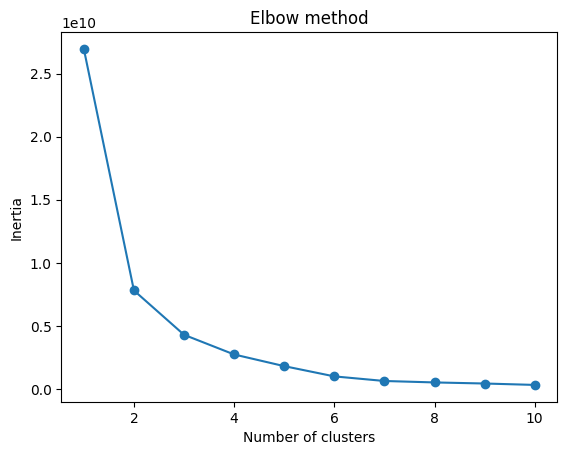

In [12]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init="auto")
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In the following plot, each point represents a month of the year.

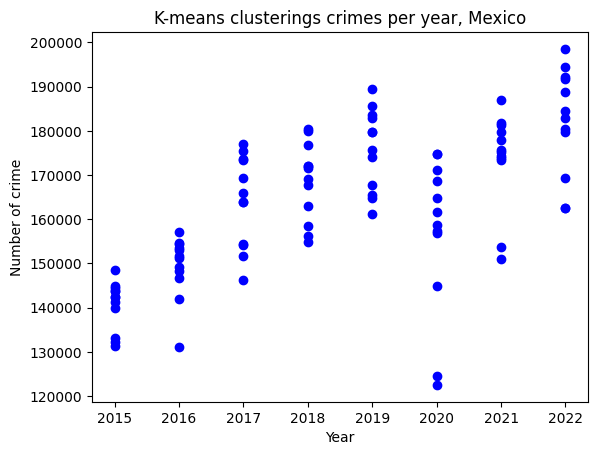

In [13]:
plt.scatter(x, y, color = "blue")
plt.title('K-means clusterings crimes per year, Mexico')
plt.xlabel('Year')
plt.ylabel('Number of crime')
plt.show()

This function creates a plot depicting the clustering of crimes within a specific state.

In [14]:
def cluster_points(entidad: str) -> None:
    points = [] 
    x = []
    y = [] 

    df = total_per_syear(entidad) 

    for i in df.index.values:
        for c in df.columns.values:
            x.append(i)
            y.append(df[c][i])
            j = (i, df[c][i])
            points.append(j)

    kmeans = KMeans(n_clusters=2, n_init="auto")
    kmeans.fit(points)

    plt.figure(figsize=(8, 6)) 
    plt.scatter(x, y, c=kmeans.labels_)
    title = f'K-means clustering crimes per year, {entidad}'
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(f'Number of crime')
    
    plt.savefig(f"{route_plots}/{title}.png")
    plt.show()

Function execution for each Mexican state.

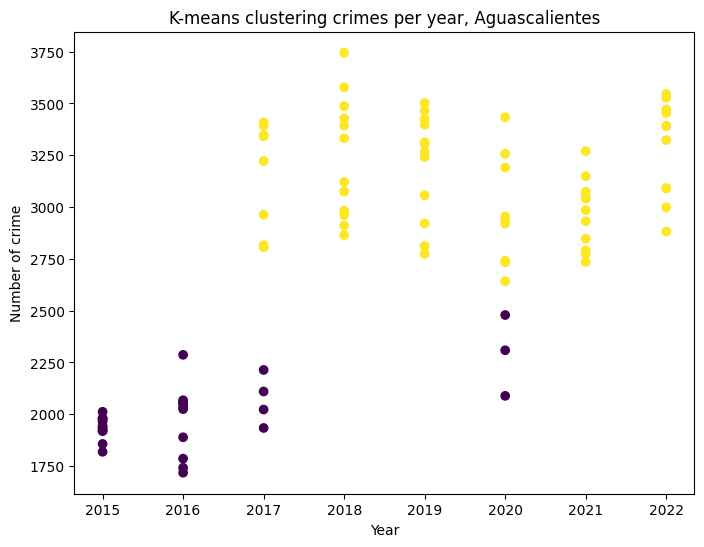

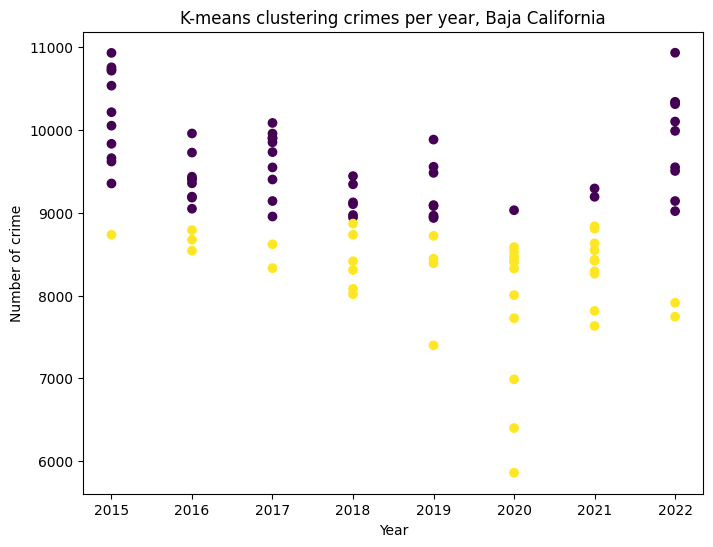

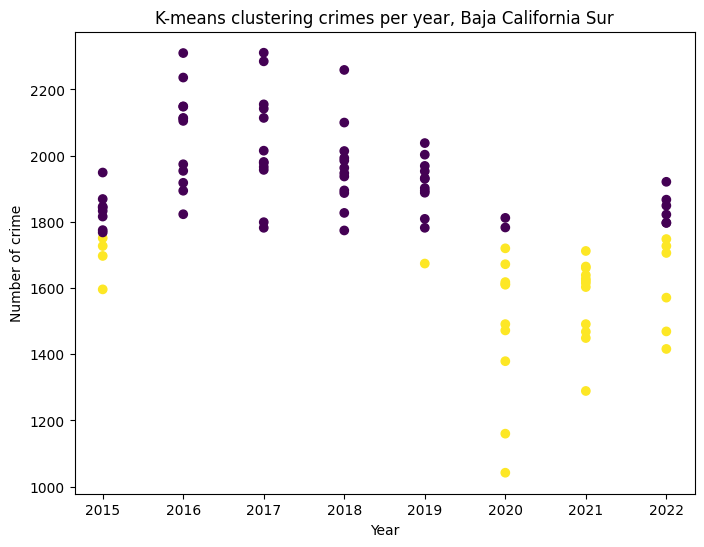

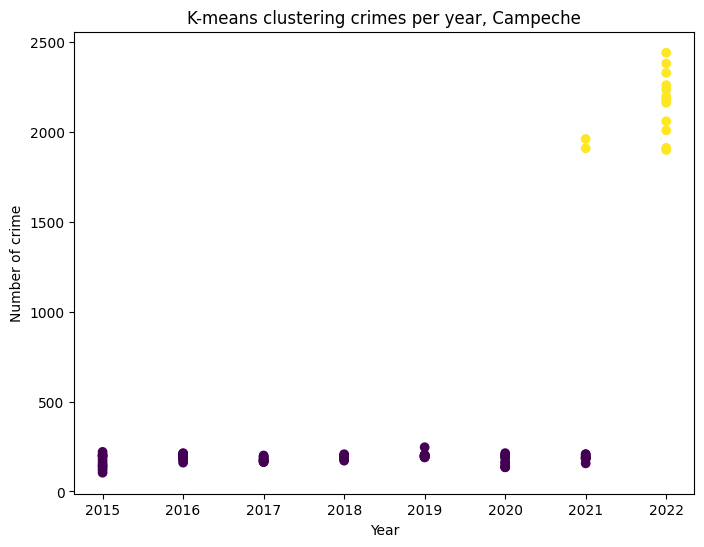

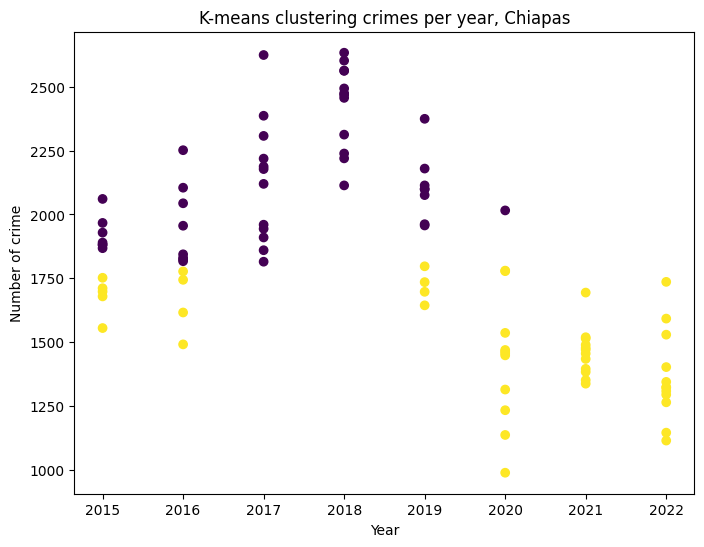

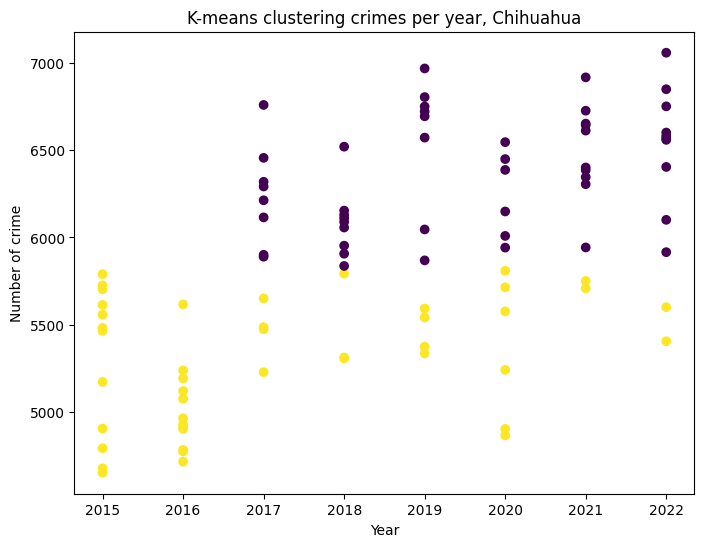

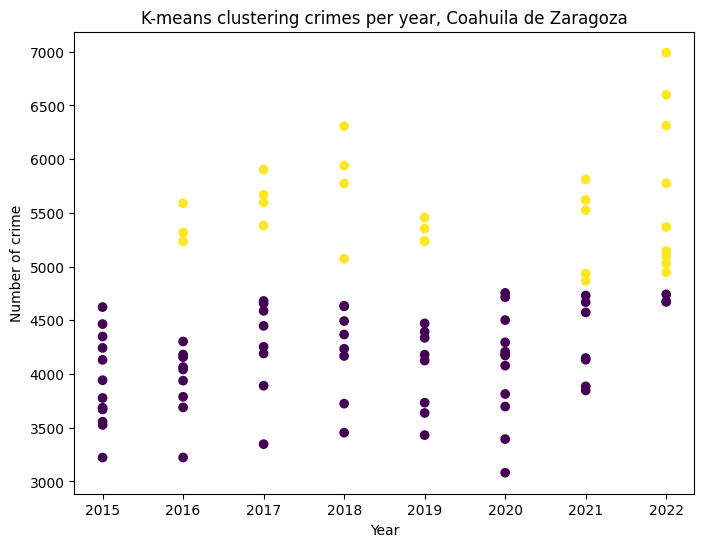

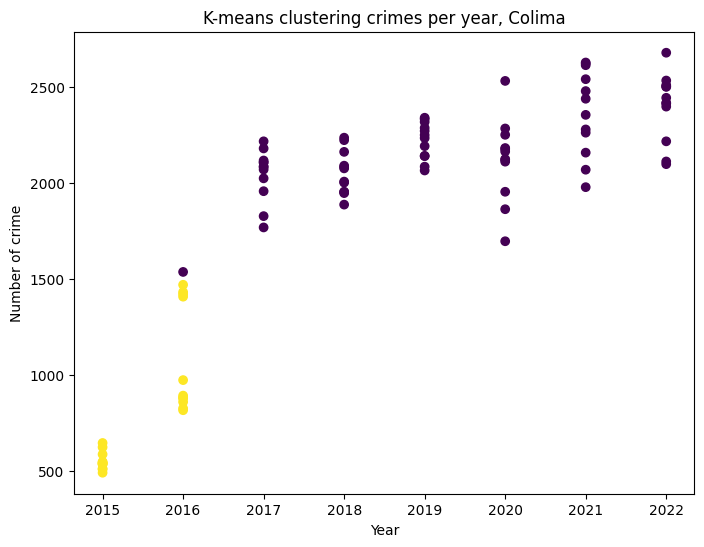

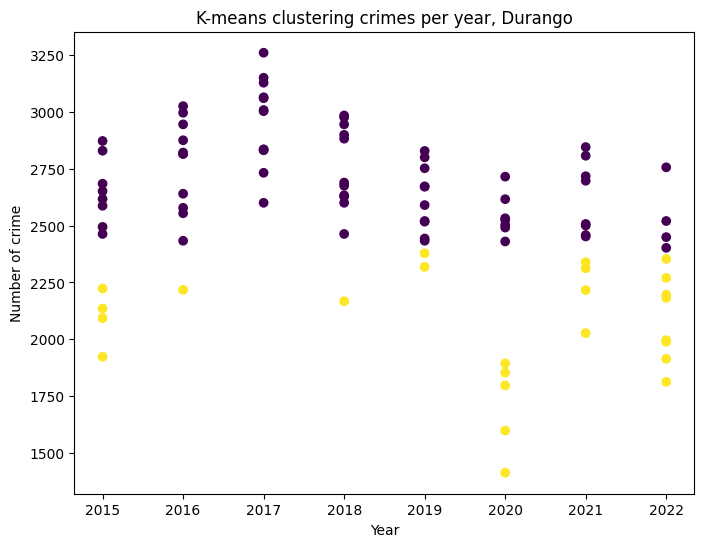

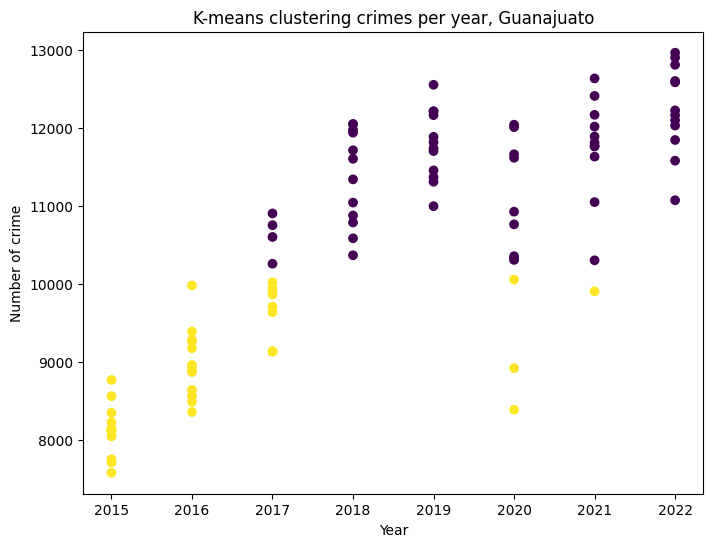

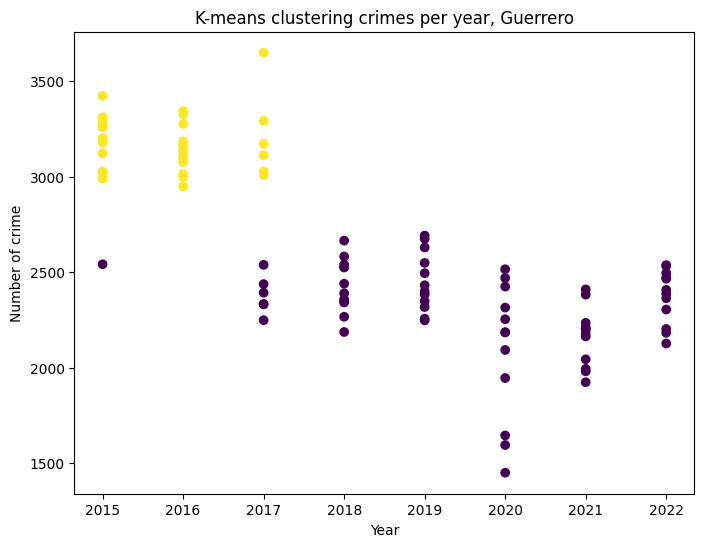

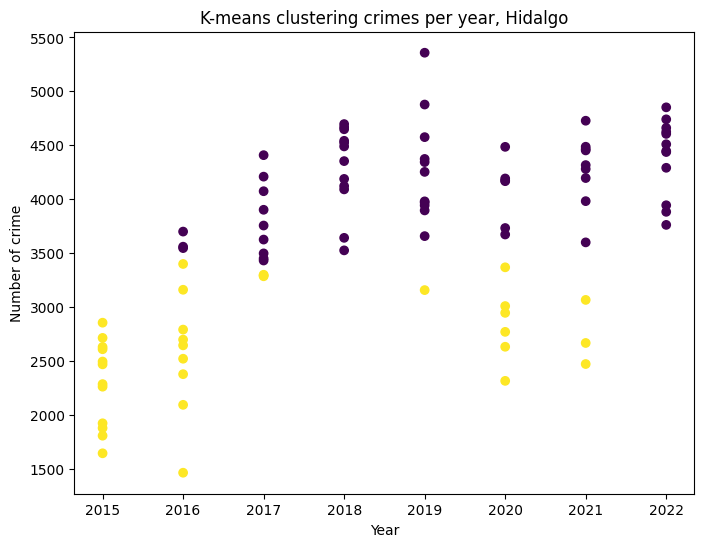

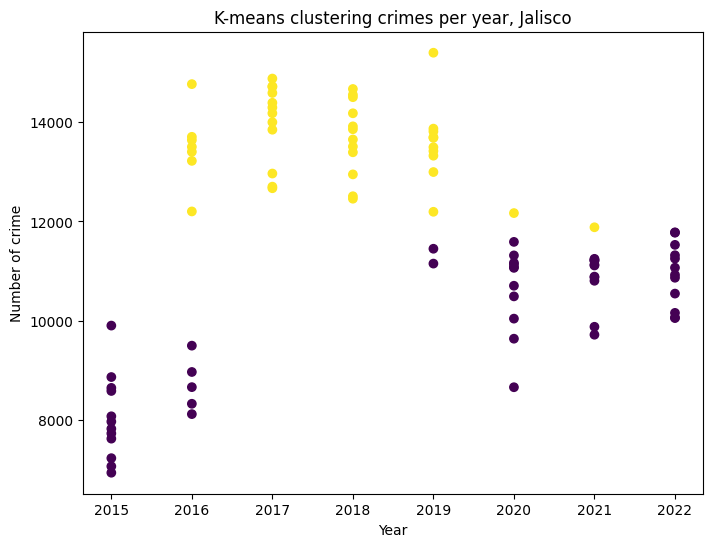

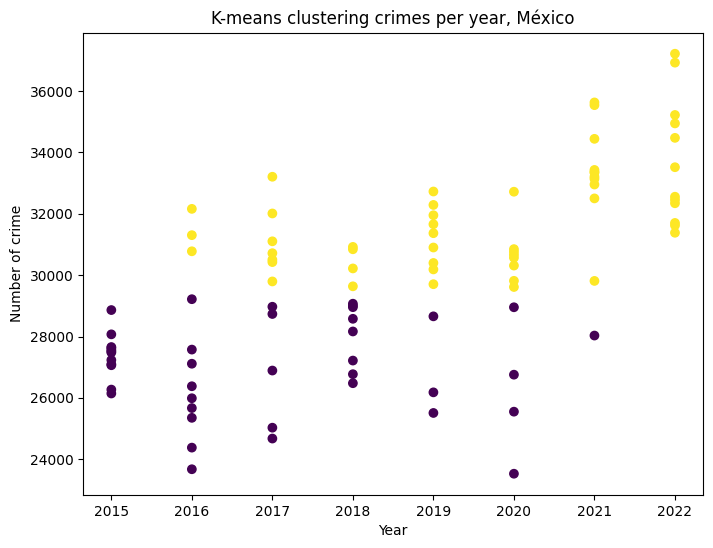

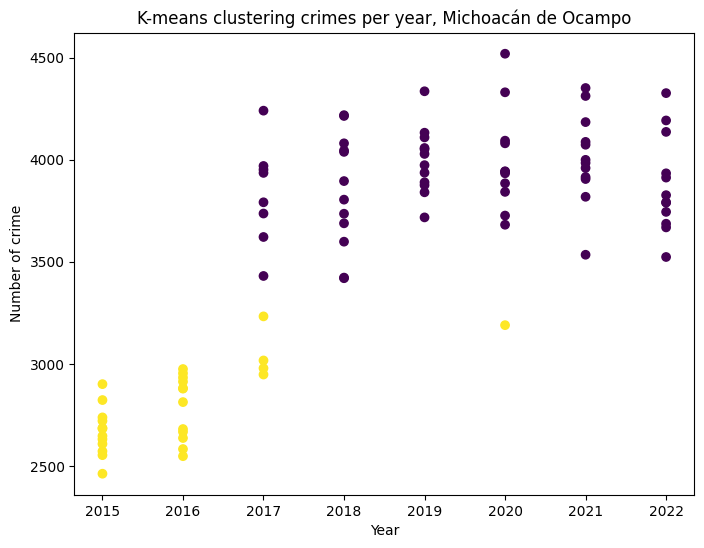

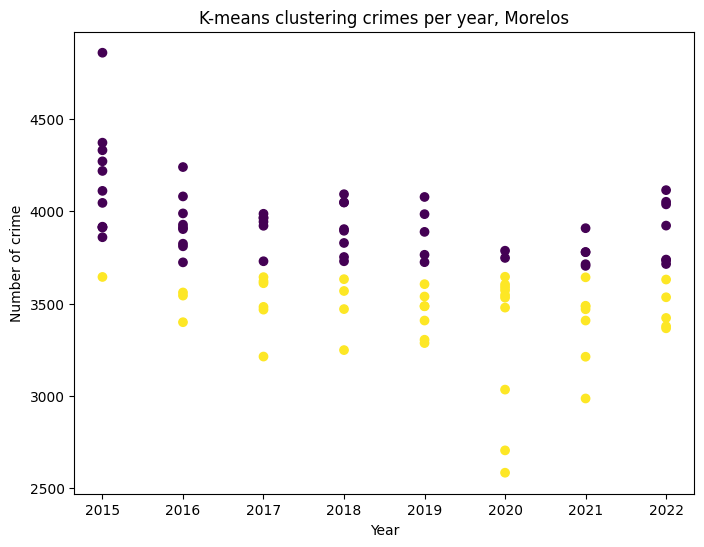

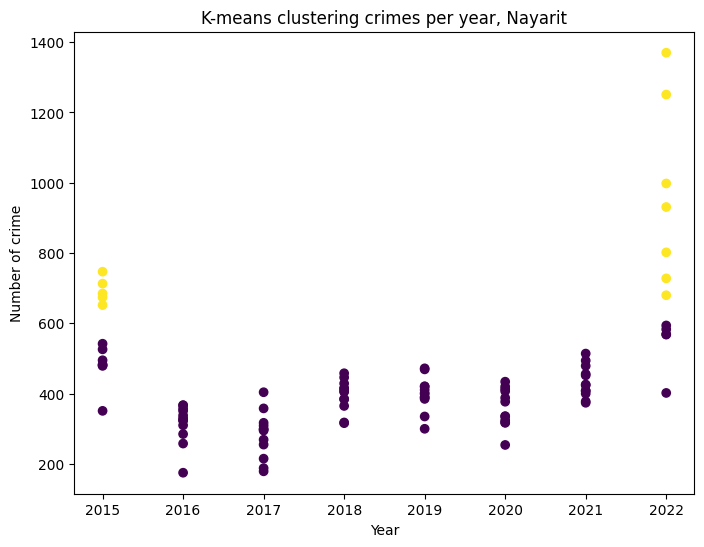

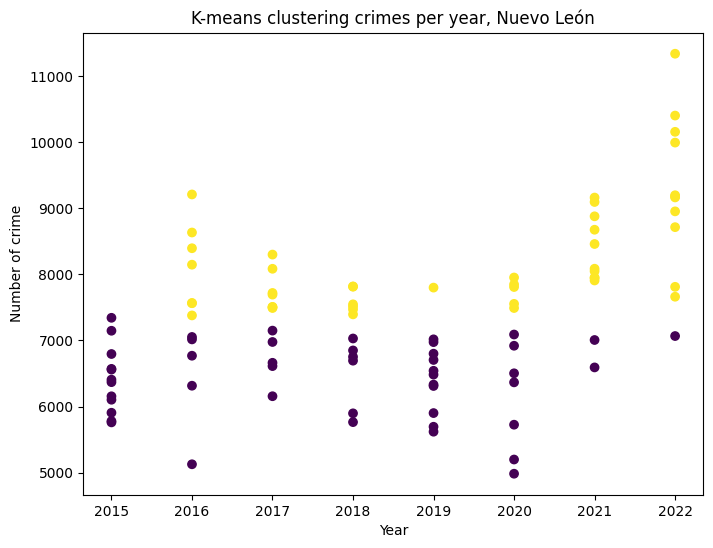

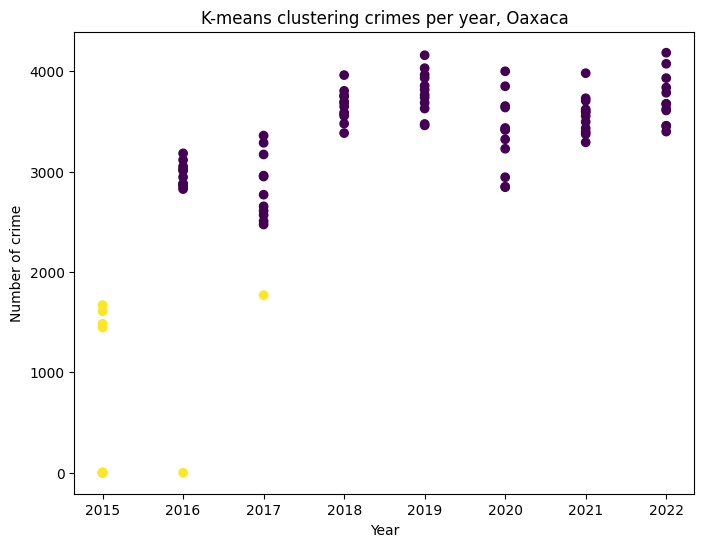

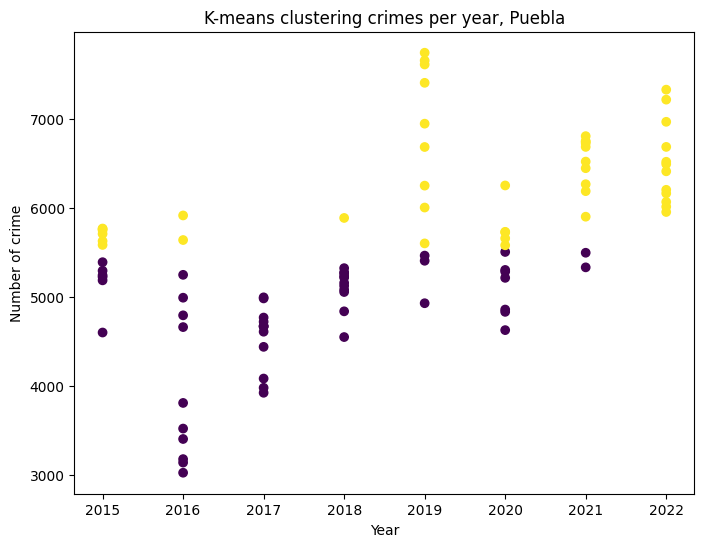

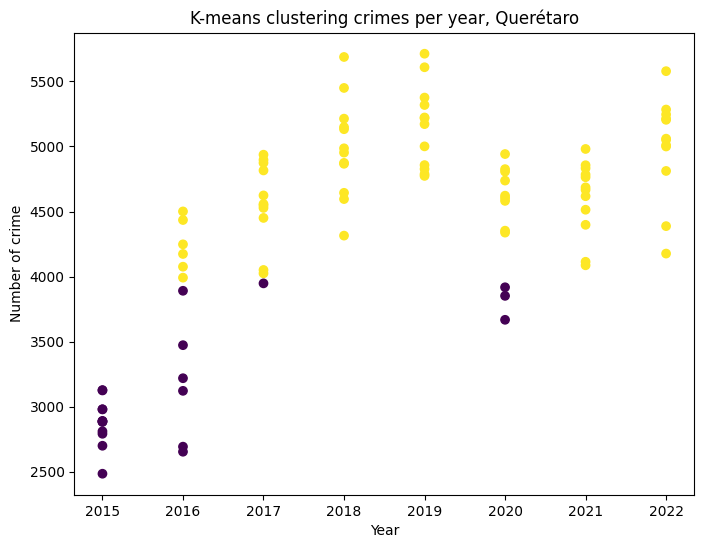

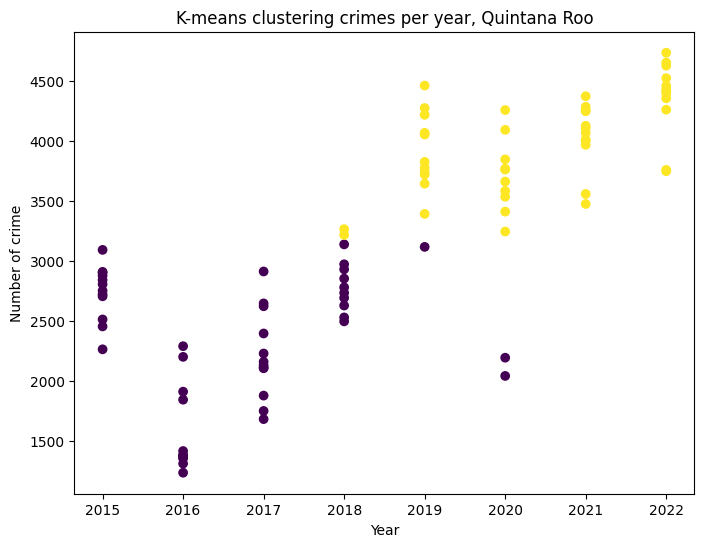

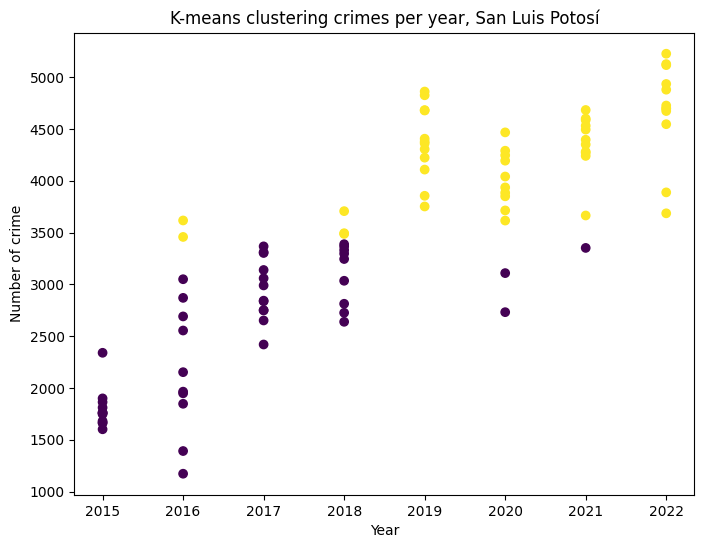

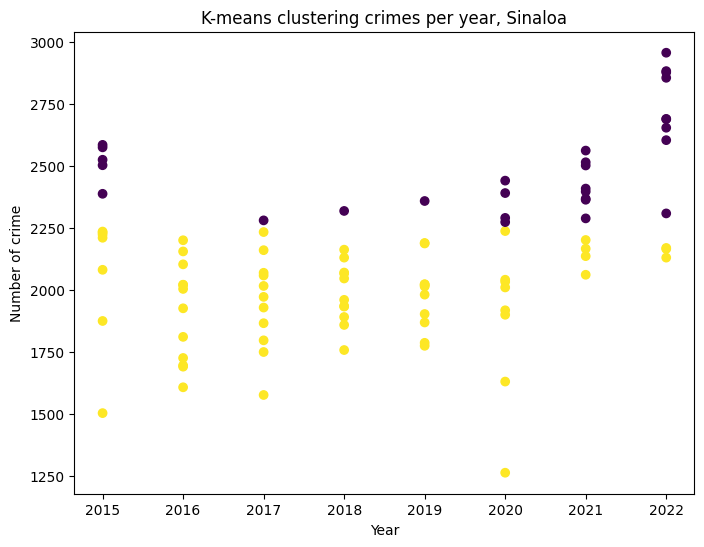

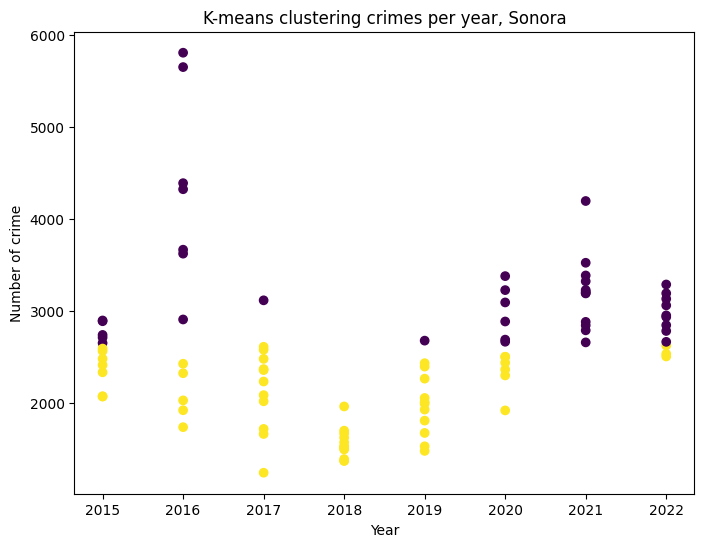

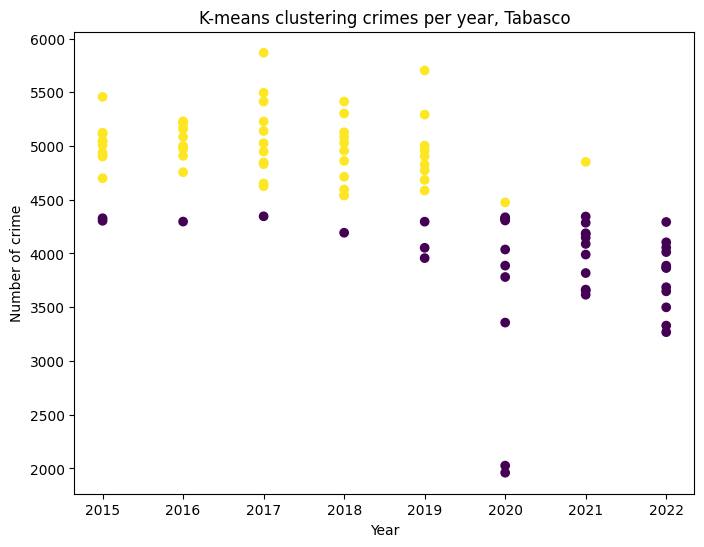

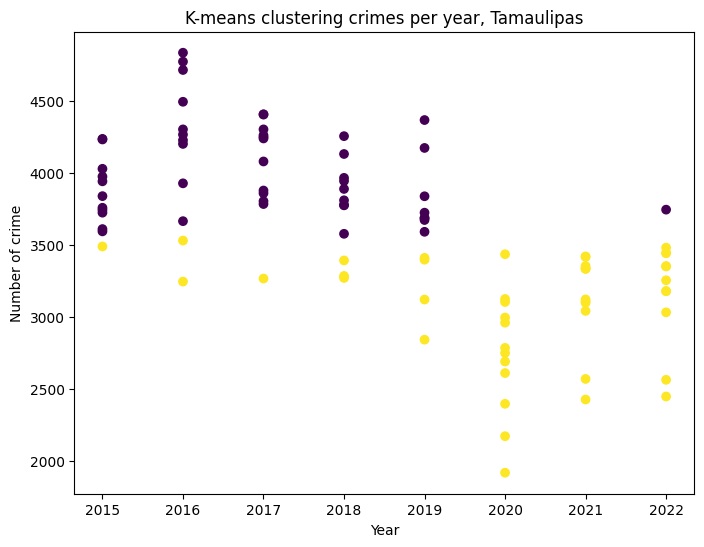

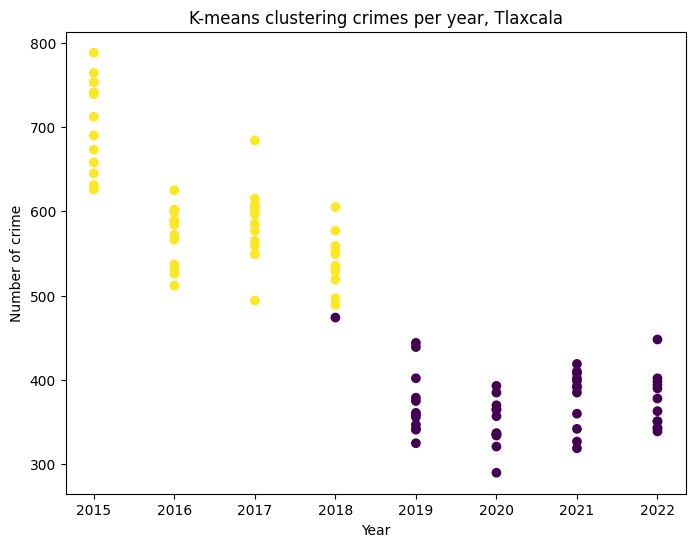

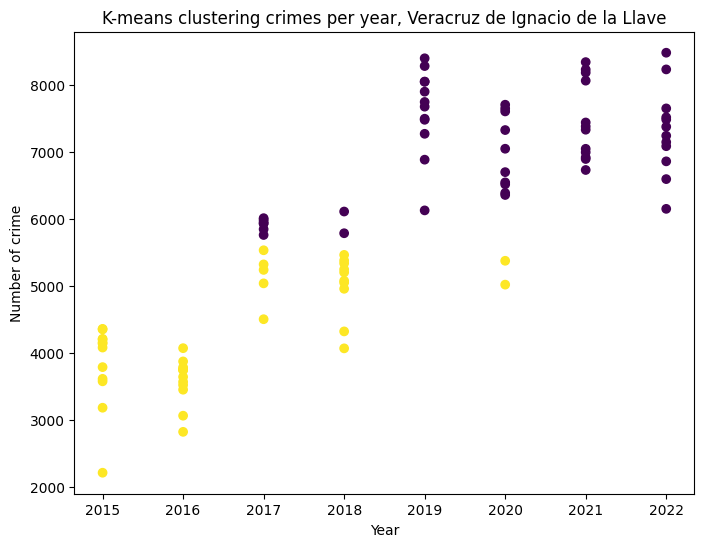

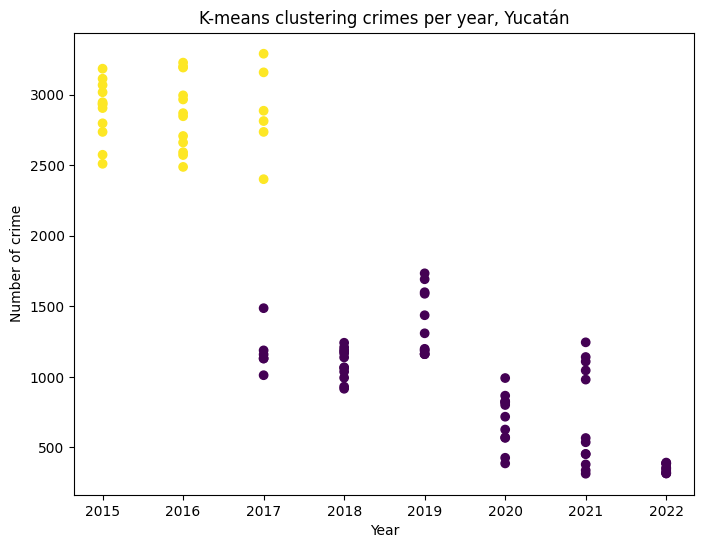

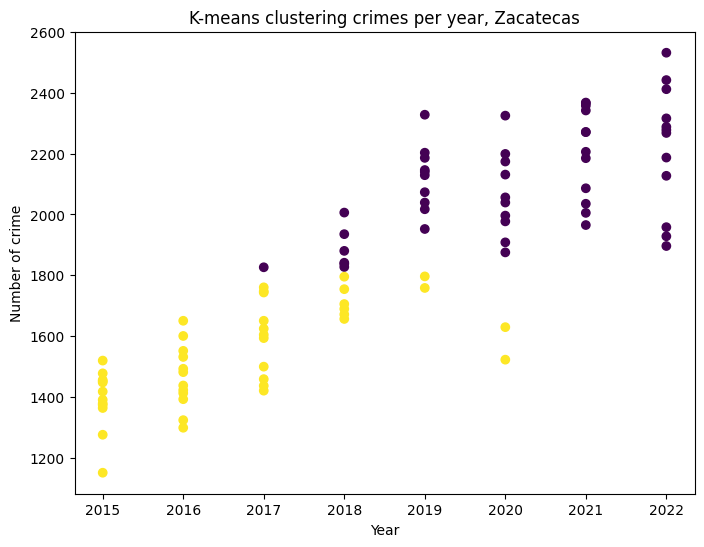

In [15]:
for state in mexican_states:
    cluster_points(state)